#Import Dependencies & Dataframe


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import kaggle
#from kaggle.api.kaggle_api_extended import KaggleApi
import datetime 
import sklearn


In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

In [3]:
df = data.data


In [4]:
y = data.target
type(y)

pandas.core.series.Series

#EDA

In [5]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [8]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


In [10]:
y.describe().T

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

In [11]:
df['y'] = y
cor = df.corr()
cor

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
y,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


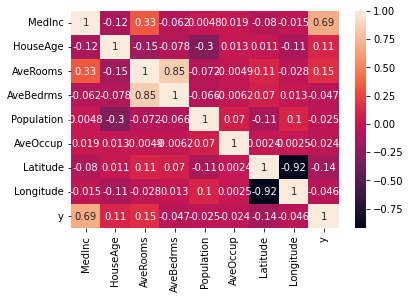

In [12]:
import seaborn as sns

sns.heatmap(cor, annot=True)

In [13]:
df_new = df.drop(labels=['HouseAge', 'AveBedrms','Population','AveOccup','Longitude'],
                 axis=1)#dateframe still includes target

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3ef322220>,
      dtype=object)

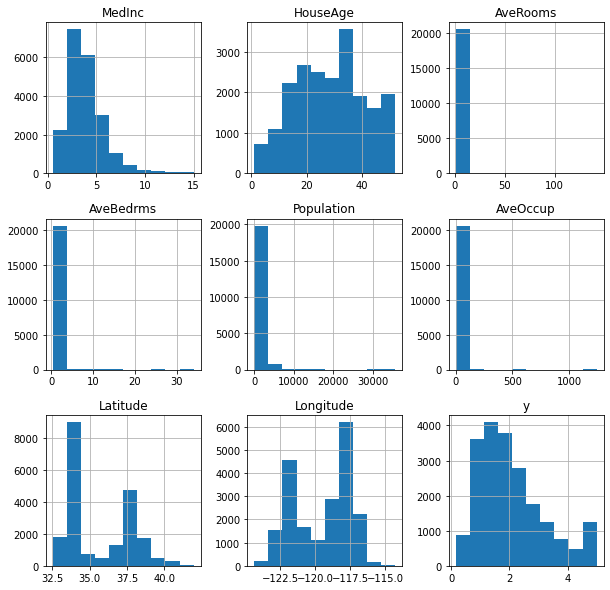

In [14]:
df.hist(figsize=(10,10))

# Build Linear Models (OLS, SGD, Ridge) 

In [15]:
from sklearn.linear_model import SGDRegressor, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df.drop(labels='y',axis=1),y,shuffle=True,test_size=.25,random_state=6)

scaler = StandardScaler()
sgd = SGDRegressor()
lr = LinearRegression()
ridge = Ridge(solver='svd',alpha=.9)
reg = make_pipeline(scaler,sgd)
reg2 = make_pipeline(scaler,lr)
reg3 = make_pipeline(scaler,ridge)


reg.fit(x_train,y_train)
reg2.fit(x_train,y_train)
reg3.fit(x_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.9, solver='svd'))])

# Make Predictions & Accuracy Scores

In [16]:
predictions = reg.predict(x_train)
predictions2 = reg2.predict(x_train)
predictions3 = reg3.predict(x_train)

In [17]:
print(f'Model accuracy score = {reg.score(x_train,y_train)}!')
print(f'Model2 accuracy score = {reg2.score(x_train,y_train)}!')
print(f'Model3 accuracy score = {reg3.score(x_train,y_train)}!')

Model accuracy score = -7174074.7589528!
Model2 accuracy score = 0.6084816100666186!
Model3 accuracy score = 0.6084815492564336!


In [18]:
print(f'Model test accuracy score = {reg.score(x_test,y_test)}!')
print(f'Model2 test accuracy score = {reg2.score(x_test,y_test)}!')
print(f'Model3 test accuracy score = {reg3.score(x_test,y_test)}!')

Model test accuracy score = -2787968.372844601!
Model2 test accuracy score = 0.5989677638702589!
Model3 test accuracy score = 0.5989620847960162!


# Pickle Model

In [19]:
import pickle

with open('ridge.pkl','wb') as f:
  pickle.dump(reg3,f)